## Autoencoders in Deep Learning

Autoencoders are a type of neural network architecture used in unsupervised learning, particularly in deep learning. **They are primarily designed for data compression and feature extraction tasks.** An autoencoder tries to learn a compressed representation of the input data by encoding it into a lower-dimensional latent space and then reconstructing the original input from this representation.

The basic structure of an autoencoder consists of two main parts: the encoder and the decoder. The encoder takes the input data and transforms it into a lower-dimensional representation, which is often referred to as the "code" or "latent space." The decoder takes this code and reconstructs the original input data from it. The goal of an autoencoder is to minimize the reconstruction error, encouraging the model to learn meaningful and compressed representations.

Autoencoders can have various architectures, including fully connected layers, convolutional layers, or recurrent layers, depending on the type of data and the task at hand. They have been successfully used for tasks such as dimensionality reduction, anomaly detection, denoising, and generating new data samples.

Here's an example of how to implement a simple autoencoder using the Keras library in Python:


Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 0.6941
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6930
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6930
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6930
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6929
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6929
Epoch 10/10
32/32 [==============================] - 0s 1ms/step


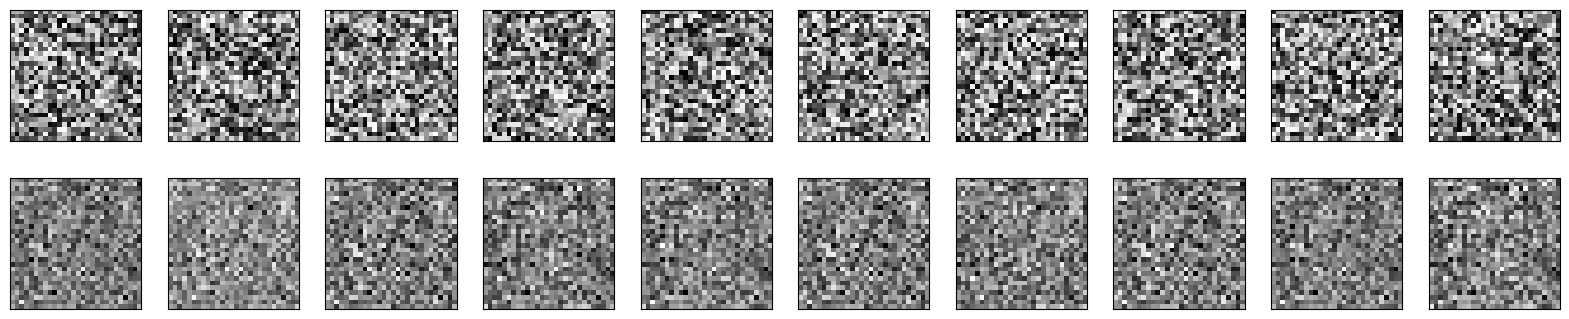

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Generate some random data
data = np.random.rand(1000, 784)

# Define the architecture of the autoencoder
input_dim = 784  # Dimension of the input data
encoding_dim = 32  # Dimension of the latent space

# Encoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder architecture
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(data, data, epochs=10, batch_size=128, shuffle=True)

# Use the trained autoencoder to encode and decode the data
encoded_data = autoencoder.predict(data)

# Display some original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.12.0'

In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

8


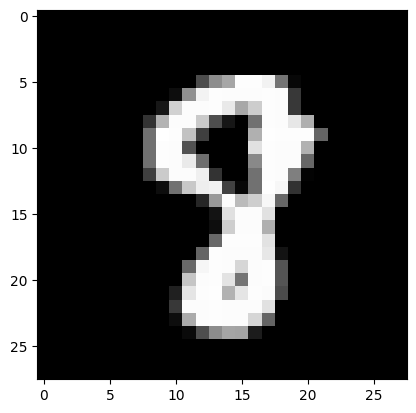

In [7]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

Axis shape: (10, 10)
Axis shape: (100,)


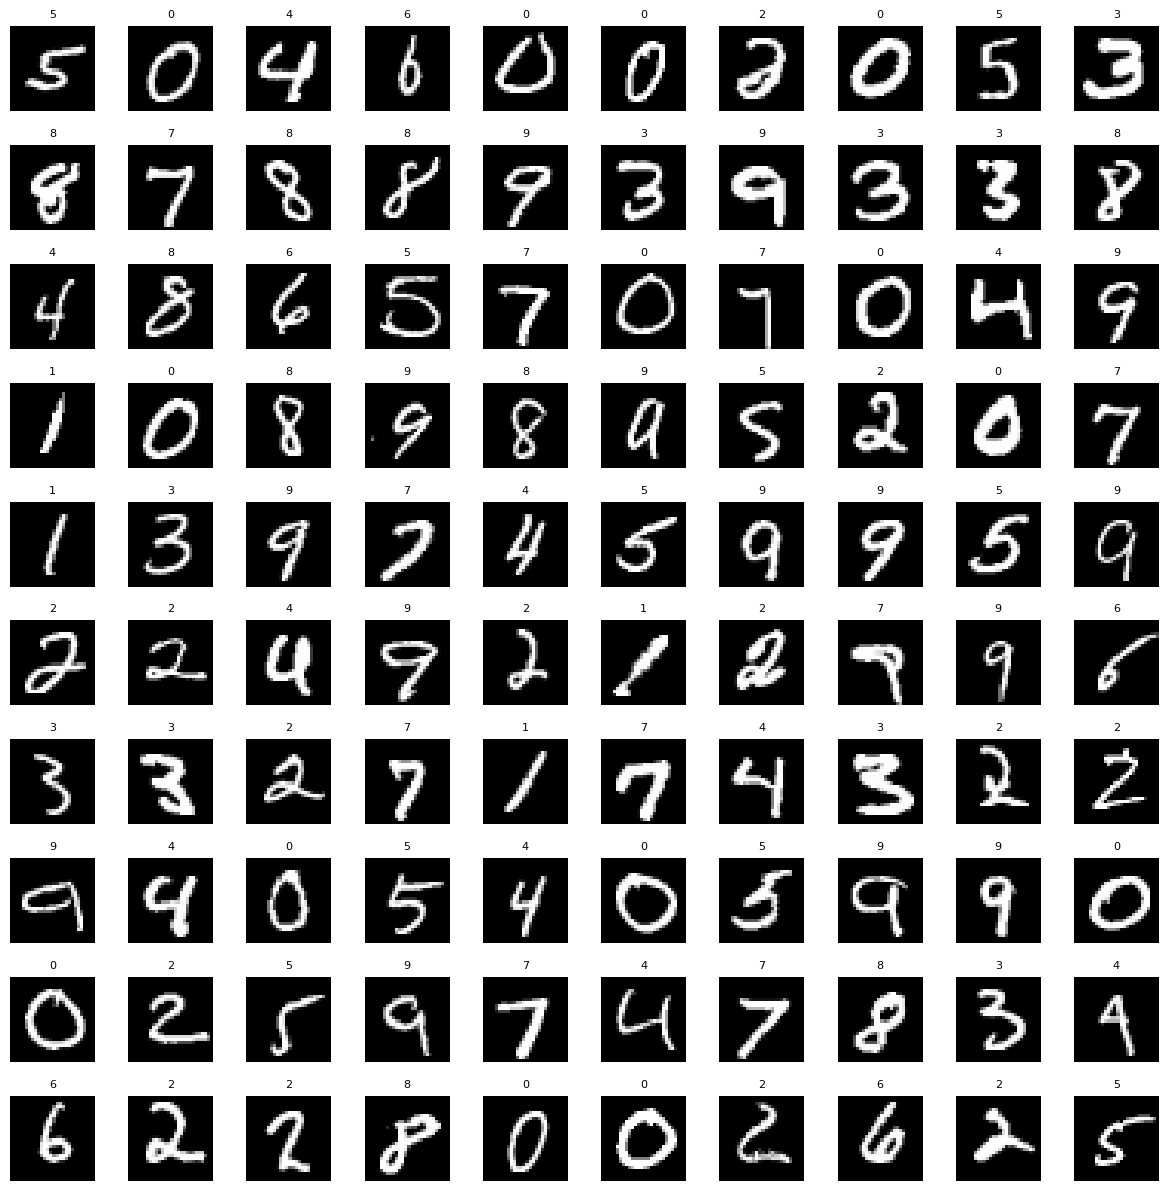

In [12]:
height = 10
width = 10
fig, axes = plt.subplots(height, width, figsize = (15,15))
print(f'Axis shape: {axes.shape}')
axes = axes.ravel() # -> (10,10) -> [100]
print(f'Axis shape: {axes.shape}')

for i in np.arange(0, width*height):
    index = np.random.randint(0, 59999)
    axes[i].imshow(X_train[index], cmap = 'gray')
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [17]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the linear autoencoder

In [18]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [21]:
autoencoder = Sequential()

#encode
autoencoder.add(Dense(units=128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [22]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50


2023-06-18 07:51:49.945005: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fefdcf06d30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-18 07:51:49.945047: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Quadro M3000M, Compute Capability 5.2
2023-06-18 07:51:50.025594: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-18 07:51:50.513189: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-06-18 07:51:51.057775: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 11s 3ms/step - loss: 0.1505 - accuracy: 0.0114
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1070 - accuracy: 0.0108
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.0114
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0947 - accuracy: 0.0126
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0919 - accuracy: 0.0135
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0897 - accuracy: 0.0141
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.0141
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0869 - accuracy: 0.0146
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.0136
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0851 - accura

In [24]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [25]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_12_input')>

In [26]:
autoencoder.get_layer('dense_14').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_14')>

In [27]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_14').output)

In [28]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12_input (InputLayer)  [(None, 784)]            0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


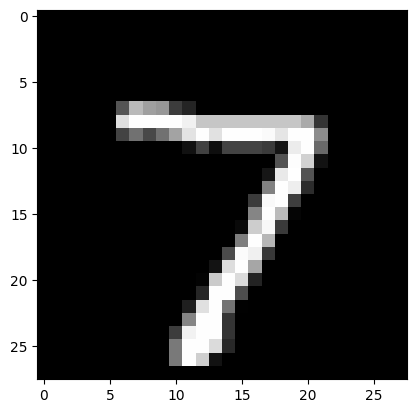

In [29]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

In [30]:
X_test[0].shape

(784,)

In [31]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [32]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 87ms/step


In [33]:
encoded_image, encoded_image.shape

(array([[1.9086579, 4.731174 , 2.871172 , 5.2118926, 1.3122896, 4.448896 ,
         1.4370577, 4.0928073, 1.2810374, 9.41477  , 2.677172 , 3.449634 ,
         4.0327225, 5.4223447, 0.       , 4.16413  , 4.563542 , 4.6765532,
         4.147392 , 5.1244597, 0.       , 6.8277755, 4.652242 , 6.267988 ,
         2.9315743, 4.089443 , 2.7207756, 6.5548425, 3.2629542, 1.638801 ,
         2.3955288, 5.2060165]], dtype=float32),
 (1, 32))

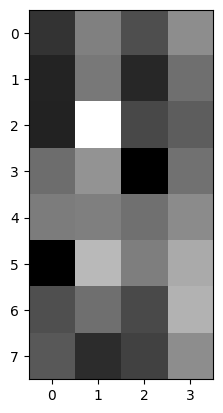

In [34]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

### Decoding the images

In [35]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [36]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [37]:
decoded_image = decoder.predict(encoded_image)
decoded_image.shape

1/1 [==============================] - 0s 49ms/step


(1, 784)

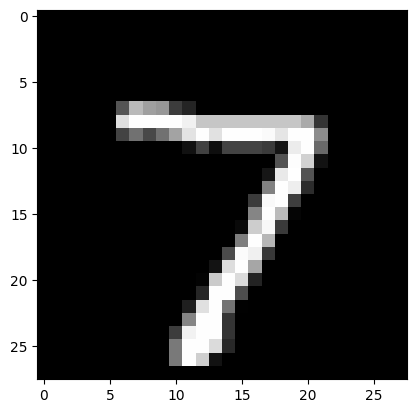

In [38]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray');

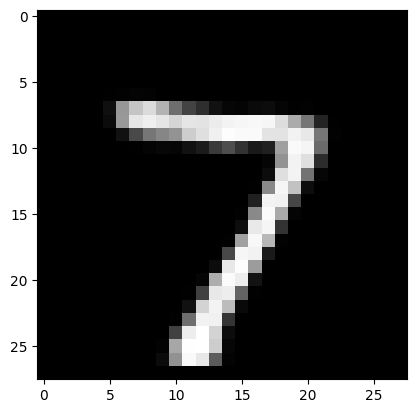

In [39]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray');

In [40]:
X_test.shape[0] # 9999

10000

1/1 [==============================] - 0s 18ms/step


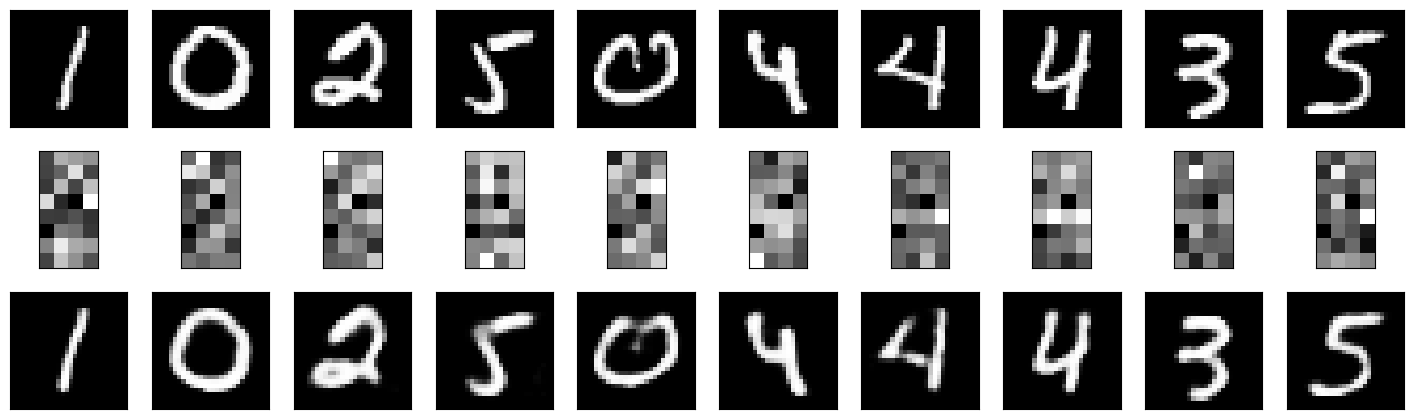

In [41]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  #print(i, image_index)
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

# Convolutional autoencoders

In [43]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten
from tensorflow.keras.datasets import fashion_mnist

In [44]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [45]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualizing the images

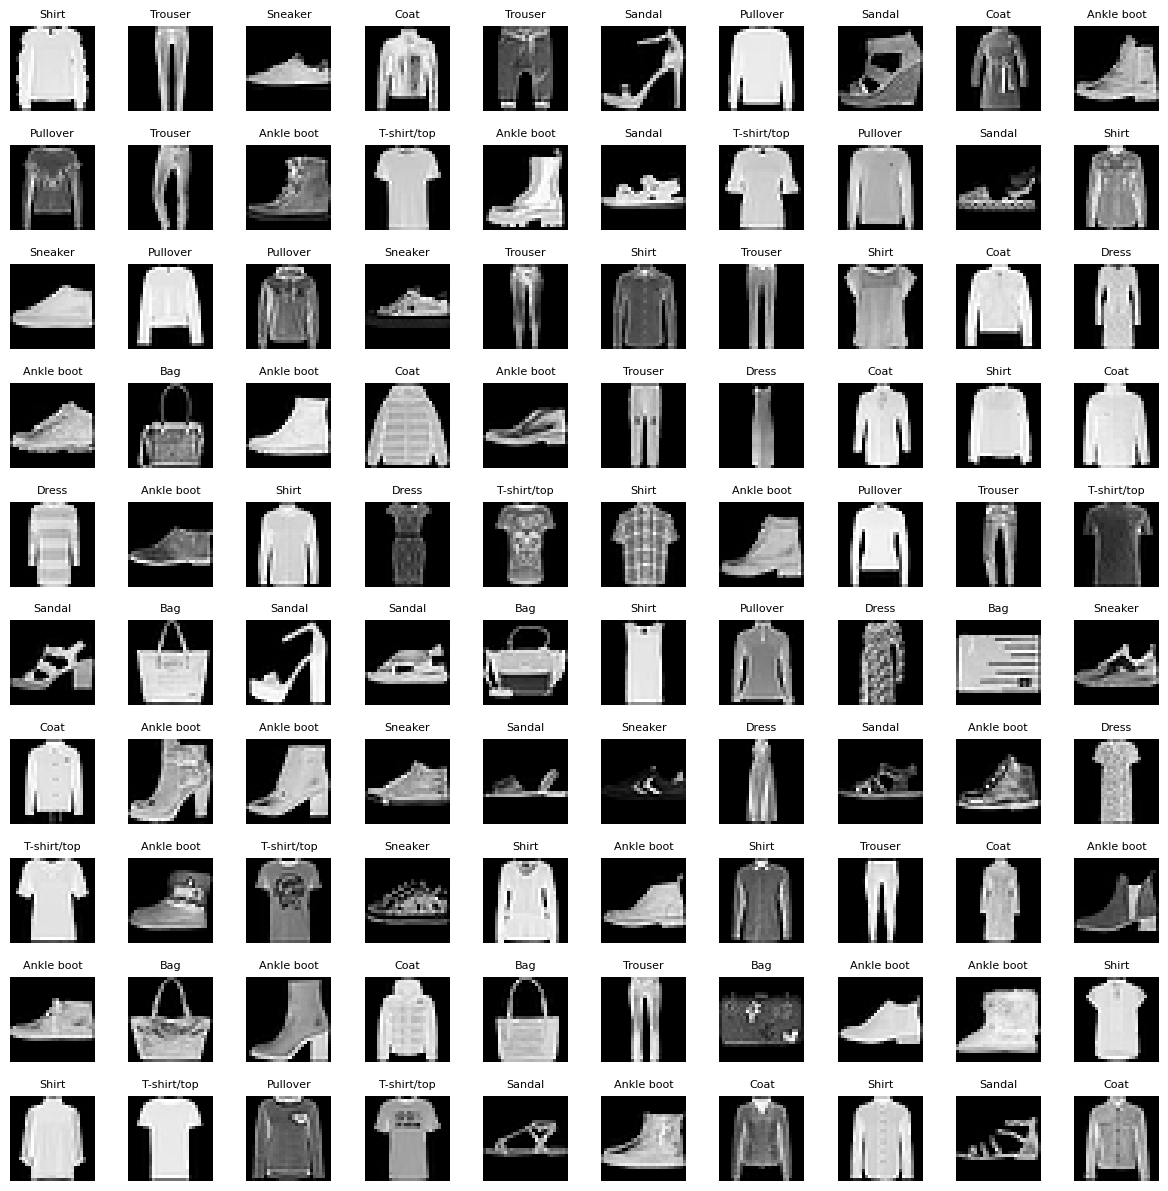

In [46]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
           'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(classes[y_train[index]], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [47]:
X_train = X_train / 255
X_test = X_test / 255
print(X_train.shape, X_test.shape)
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### Building and training the convolutional autoencoder

In [51]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

print(autoencoder.summary())

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding = 'same', strides=(2,2)))

autoencoder.add(Flatten())

print(autoencoder.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_4"
_________________________

In [52]:
# Decoder

autoencoder.add(Reshape((4,4,8)))
# print(autoencoder.summary())
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)              

In [53]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output: (28 - 3 + 1) / 1 = 26 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output: (16 - 3 + 1) / 1 = 14 -> (14, 14, 16)

In [54]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 16s 5ms/step - loss: 0.3128 - accuracy: 0.5034
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2890 - accuracy: 0.5062
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2845 - accuracy: 0.5068
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2818 - accuracy: 0.5071
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2801 - accuracy: 0.5073
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2789 - accuracy: 0.5075
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2781 - accuracy: 0.5076
Epoch 8/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2773 - accuracy: 0.5077
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2766 - accuracy: 0.5078
Epoch 10/50
1875/1875 [==============================] - 10s 5ms/step - los

In [58]:
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)              

In [60]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584 

In [61]:
coded_test_images = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [62]:
coded_test_images.shape

(10000, 128)

In [63]:
coded_test_images[0]

array([0.3769121 , 0.23002717, 0.3485512 , 0.13626638, 0.        ,
       0.22513264, 0.33766615, 0.11091369, 0.67578614, 0.38223845,
       0.46684748, 0.11533873, 0.01218352, 0.26061058, 0.07235175,
       0.18445724, 0.6505356 , 0.3749732 , 0.45863485, 0.11570331,
       0.03263861, 0.22979239, 0.05585843, 0.16506204, 0.62426484,
       0.5570841 , 0.43297   , 0.2960946 , 0.20868865, 0.54468966,
       0.28097388, 0.4401873 , 0.38866547, 0.27067015, 0.44226456,
       0.20874843, 0.13120455, 0.327647  , 0.3977779 , 0.27020255,
       0.6398707 , 0.79684764, 0.7235787 , 0.9497168 , 0.20696384,
       0.71106446, 0.0236986 , 1.0438563 , 0.7887566 , 1.9581323 ,
       1.5320332 , 1.4819252 , 1.0353383 , 1.230408  , 0.        ,
       1.4744815 , 0.2775393 , 1.6701677 , 0.80948526, 0.30831283,
       0.7596334 , 0.868419  , 0.        , 0.65972507, 0.5393962 ,
       1.1845617 , 1.3887112 , 1.3502271 , 0.9582758 , 0.9978757 ,
       0.        , 0.96648884, 0.5235353 , 1.8044409 , 1.07005

In [64]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

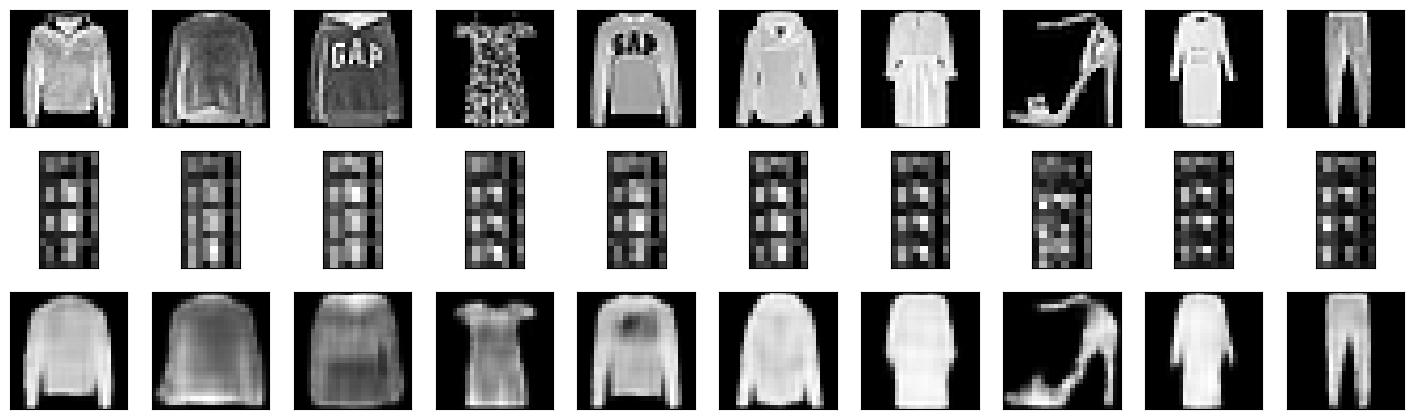

In [65]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10, i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())